In [1]:
import pandas as pd
import numpy as np
import re
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_caba.csv')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,TitleClean,DescriptionClean,Title_m2,SinUSD,SinUSS,Sin_m2,id,price_usd_m2_filled,price_m2_filled,mts2_completar,lat_filled,lon_filled,geometry,distancia_obelisco
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.00000,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,NaN,NaN,NaN,NaN,NaN,NaN,0,1127.272727,1550.000000,55.00000,-34.661824,-58.508839,POINT (-58.5088387 -34.6618237),14555.078219
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.00000,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,NaN,NaN,NaN,NaN,NaN,NaN,1,1309.090909,1309.090909,55.00000,-34.652262,-58.522982,POINT (-58.5229825 -34.6522615),15988.570648
2,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,52.66343,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,NaN,NaN,NaN,NaN,NaN,NaN,2,1803.908335,2278.839694,52.66343,-34.647797,-58.516424,POINT (-58.5164244 -34.6477969),15224.874751
3,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.00000,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,NaN,NaN,NaN,NaN,NaN,NaN,3,3066.666667,3450.000000,45.00000,-34.559873,-58.443362,POINT (-58.443362 -34.5598729),7381.316759
4,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.00000,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,NaN,NaN,NaN,NaN,NaN,NaN,4,3000.000000,3250.000000,65.00000,-34.559873,-58.443362,POINT (-58.443362 -34.5598729),7381.316759


In [4]:
data2 = data.drop(['TitleClean', 'DescriptionClean', 'Title_m2', 'SinUSD', 'SinUSS', 'Sin_m2'], axis=1)
data2.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,id,price_usd_m2_filled,price_m2_filled,mts2_completar,lat_filled,lon_filled,geometry,distancia_obelisco
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0,1127.272727,1550.000000,55.0,-34.661824,-58.508839,POINT (-58.5088387 -34.6618237),14555.078219
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,1309.090909,1309.090909,55.0,-34.652262,-58.522982,POINT (-58.5229825 -34.6522615),15988.570648


In [5]:
data2.price_usd_per_m2.fillna(data2.price_usd_m2_filled, inplace=True)

In [6]:
data2.price_per_m2.fillna(data2.price_m2_filled, inplace=True)

In [7]:
data2.surface_total_in_m2.fillna(data2.mts2_completar, inplace=True)

In [8]:
data2.lon.fillna(data2.lon_filled, inplace=True)

In [9]:
data2.lat.fillna(data2.lat_filled, inplace=True)

In [10]:
data3 = data2.drop(['price_usd_m2_filled', 'price_m2_filled', 'mts2_completar', 'lat_filled', 'lon_filled','Unnamed: 0'], axis=1)

In [11]:
# Creamos rangos de m2 con un pd.cut para falicitar el análisis de los tipos de propiedades
bins = [0,50,100,300000]
cuantil = pd.cut(data3['surface_total_in_m2'], bins, right=False)
cuantil.value_counts()

[50, 100)        10432
[0, 50)          10359
[100, 300000)     8193
Name: surface_total_in_m2, dtype: int64

In [12]:
pd.options.display.max_rows = None
grp_barrio = data3.groupby(['property_type',cuantil])[['price_usd_per_m2','price_aprox_usd']].mean().round(2)
grp_barrio

price_usd_per_m2  price_aprox_usd
property_type surface_total_in_m2                                   
PH            [0, 50)                       3469.92        101316.32
              [50, 100)                     2012.86        141754.90
              [100, 300000)                 1557.58        252918.96
apartment     [0, 50)                       3856.21        136986.27
              [50, 100)                     2639.94        180648.64
              [100, 300000)                 3179.63        574940.96
house         [0, 50)                       8330.78        282143.82
              [50, 100)                     2450.42        187791.59
              [100, 300000)                 1603.85        527297.40
store         [0, 50)                       3578.86        103491.40
              [50, 100)                     3203.81        226960.34
              [100, 300000)                 2494.47        786583.74

In [13]:
data3.groupby(['place_name'])[['price_aprox_usd']].count().sort_values(by='price_aprox_usd',ascending=False)

,price_aprox_usd
place_name,
Belgrano,2532
Palermo,2515
Caballito,2055
Recoleta,1424
Villa Urquiza,1361
Flores,1275
Villa Crespo,1185
San Telmo,1161
Barrio Norte,1019


In [14]:
data3.groupby(['place_name'])[['price_usd_per_m2']].mean().sort_values(by='price_usd_per_m2',ascending=False)

,price_usd_per_m2
place_name,
Boedo,10697.513056
San Cristobal,9952.388570
Puerto Madero,6029.687303
Palermo Chico,4797.326384
Las Cañitas,3476.175811
Recoleta,3392.858919
Palermo,3391.181675
Nuñez,3246.570606
Palermo Soho,3216.460451


In [51]:
data4 = data3[(data3['place_name']=='Retiro') | (data3['place_name']=='San Nicolás') | (data3['place_name']=='Monserrat') | (data3['place_name']== 'Puerto Madero') | (data3['place_name']=='San Telmo') | (data3['place_name']=='Constitución')]

In [52]:
data5 = data4[(data4['property_type']!='store')]

In [53]:
data5.count()

operation                     2680
property_type                 2680
place_name                    2680
place_with_parent_names       2680
country_name                  2680
state_name                    2680
geonames_id                   2680
lat-lon                       1967
lat                           2680
lon                           2680
price                         2679
currency                      2679
price_aprox_local_currency    2679
price_aprox_usd               2680
surface_total_in_m2           2680
surface_covered_in_m2         2558
price_usd_per_m2              2680
price_per_m2                  2680
floor                          204
rooms                         1436
expenses                       434
properati_url                 2680
description                   2680
title                         2680
image_thumbnail               2537
id                            2680
geometry                      2680
distancia_obelisco            2680
dtype: int64

In [54]:
data5['surface_total_in_m2'].sort_values(ascending=False)

27225    1183.000000
4572     1159.000000
7128      950.000000
16353     639.000000
16352     639.000000
2952      600.000000
11339     598.000000
4993      595.577971
22048     592.000000
25378     592.000000
11568     592.000000
2300      550.000000
9747      500.000000
1239      495.000000
8589      480.000000
3355      478.000000
26179     475.000000
20936     460.000000
13606     455.000000
12091     450.000000
12090     450.000000
2634      450.000000
23200     444.000000
17261     441.000000
17139     441.000000
7943      431.199807
3247      431.199807
14459     420.000000
2385      406.000726
26806     404.000000
9485      404.000000
22466     404.000000
4197      403.525654
9126      400.000000
8526      400.000000
2289      400.000000
19772     400.000000
3793      400.000000
6986      399.479483
977       395.000000
14855     384.000000
7853      380.000000
14340     373.000000
8543      373.000000
8296      366.189526
21222     365.000000
2136      363.000000
2137      363

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_aprox_usd'>

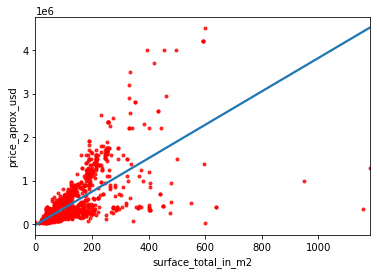

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data = data5, x="surface_total_in_m2", y="price_aprox_usd", order=1, ci=None, scatter_kws={'color':'r', 's':9})

In [57]:
data5.shape

(2680, 28)

In [96]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

feature_col = ['surface_total_in_m2', 'distancia_obelisco']

X = data5[feature_col]
y = data5.price_aprox_usd

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

In [97]:
#Entrenamos el modelo de REGRESION LINEAL SIMPLE
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(Xtrain, ytrain)

LinearRegression()

In [98]:
model.intercept_

-152831.61096902378

In [99]:
model.coef_

array([3200.39129011,  137.58375238])

In [100]:
ypred = model.predict(Xtest)

In [101]:
ypred

array([ 1.70993497e+05,  6.89983042e+05,  9.20069333e+04,  1.32476498e+05,
        1.17491765e+05,  7.47463120e+05,  8.40330842e+04,  8.11374800e+04,
        2.09269152e+04,  9.57362414e+05,  9.88088541e+04,  1.13274150e+05,
        2.13595194e+05,  2.14343208e+05,  2.35838687e+05,  7.34557173e+05,
        2.49412852e+05,  1.84818281e+05,  4.43171710e+05,  8.44584025e+04,
       -1.42773890e+04,  9.78050240e+05,  1.23602311e+05,  1.87860848e+05,
        4.19273800e+05,  3.98867492e+05,  1.68816324e+05,  1.08008890e+05,
        1.62415542e+05,  1.59215150e+05,  4.88336975e+05,  1.69304655e+05,
        4.00893432e+05,  1.41348620e+05,  2.03994021e+05,  1.20810455e+05,
        1.31227985e+05,  1.40012803e+05,  3.31229986e+04,  3.31179015e+05,
        2.53602306e+05,  1.69180835e+05,  9.35014745e+04,  7.74747966e+05,
        1.08008890e+05,  1.63633644e+05,  2.47560644e+05,  1.68816324e+05,
        6.52083587e+04,  3.45183950e+05,  2.25271914e+05,  2.71228846e+05,
        1.56069038e+05,  

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 148147.79
MSE: 101612651377.32
RMSE: 318767.39
R2: 0.62


In [92]:
from sklearn.naive_bayes import GaussianNB
# Modelo GaussianNB con la variable categorica dummies BARRIO

# data5 = pd.get_dummies(data5, drop_first=True)
# data5.head()

In [93]:
model2 = GaussianNB()
# Creamos X e y
feature_col = ['surface_total_in_m2', 'distancia_obelisco']
X = data5[feature_col]
y = data5.price_aprox_usd

In [104]:
nbXtrain, nbXtest, nbytrain, nbytest = train_test_split(X, y, random_state=1)
model2.fit(nbXtrain, nbytrain)
nbypred = model2.predict(nbXtest)
nbypred

array([  78500.,  130000.,   64827.,  130000.,  193872.,   92000.,
         79465.,  320000.,   77266.,   60500.,  749000.,   67500.,
         68063.,  320000., 1622250.,   84240., 1622250.,   97000.,
         84240.,   77059.,  250000., 1229549.,   87000.,   69762.,
         85000.,  143131.,   36943.,  140000.,  395000.,   85000.,
        130000.,  630000.,  630000., 1400000.,   69762.,   94000.,
         85500.,  156336.,   84900.,   64973.,   75500.,  330000.,
        345000.,   76000.,   76000.,  124852.,   82500.,  120000.,
         76000.,   76000.,  130000.,   50000.,   87000.,  120000.,
       1450000.,  650000.,  395000.,  550000.,   67000.,  920000.,
        720000.,  108200.,  155000.,  140000.,  155000.,  127850.,
       1500000.,   87000.,  345000.,  475000.,   88440.,  130000.,
       1176000.,   89000.,  345000.,  330000.,  345000.,   62900.,
        650000.,  250000.,  187000.,  104400.,  350000.,  730000.,
        450000.,   67000.,  395000.,  135879.,  345000.,  1301

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(nbytest, nbypred)

0.056716417910447764

In [107]:
#Probamos el modelo de OLS
import statsmodels.api as sm
feature_cols = ['surface_total_in_m2', 'distancia_obelisco']
X = data5[feature_cols]
y = data5.price_aprox_usd

In [108]:
# Agregamos la constante
X = sm.add_constant(X)

In [110]:
model3 = sm.OLS(y, X).fit()
print (model3.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1760.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        15:54:47   Log-Likelihood:                -37602.
No. Observations:                2680   AIC:                         7.521e+04
Df Residuals:                    2677   BIC:                         7.523e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.741e+05   1

In [111]:
#CON INTERACCION ENTRE VARIABLES
data5["surface_total_in_m2_x_distancia_obelisco"] = data5.surface_total_in_m2 * data5.distancia_obelisco

In [113]:
feature_cols = ["surface_total_in_m2", "distancia_obelisco", "surface_total_in_m2_x_distancia_obelisco"]

X = data5[feature_cols]
y = data5.price_aprox_usd

In [114]:
X = sm.add_constant(X)

In [115]:
model_interaccion = sm.OLS(y, X).fit()
print (model_interaccion.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1257.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        16:00:13   Log-Likelihood:                -37548.
No. Observations:                2680   AIC:                         7.510e+04
Df Residuals:                    2676   BIC:                         7.513e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------